Training Step: 2150  | total loss: 0.01210
| Adam | epoch: 010 | loss: 0.01210 | val_loss: 0.00982 -- iter: 55000/55000
Training Step: 2150  | total loss: 0.01210
| Adam | epoch: 010 | loss: 0.01210 | val_loss: 0.00982 -- iter: 55000/55000
--

Test encoding of X[0]:
[[-0.3591921925544739, -0.30620265007019043, -2.1293210983276367, 0.016302326694130898, 0.3878253102302551, -1.928462266921997, 0.08402847498655319, -0.1711994707584381, 2.33090877532959, -0.4419057369232178, 0.5595836639404297, 0.22730986773967743, 0.2467481791973114, -0.046423040330410004, 0.8219861388206482, 0.3121873140335083, -1.0990464687347412, -0.44748756289482117, -1.0537118911743164, 0.27892017364501953, -0.16080328822135925, -0.7924893498420715, -0.537013828754425, 0.6973184943199158, 0.8154915571212769, 0.14678657054901123, 0.8317134976387024, 0.12725719809532166, -0.28440558910369873, -0.40325647592544556, 1.4949846267700195, 1.323862910270691, 0.9407923221588135, -1.005354404449463, 0.6234555244445801, -0.0352

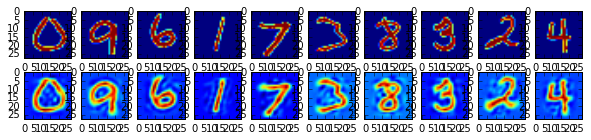

In [8]:
""" Auto Encoder Example.
Using an auto encoder on MNIST handwritten digits.
References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
"""
%matplotlib inline
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn
import tensorflow as tf

tf.reset_default_graph()
# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784)

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)

# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, n_epoch=10, validation_set=(testX, testX),
          run_id="auto_encoder", batch_size=256)

# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
testX = tflearn.data_utils.shuffle(testX)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    a[0][i].imshow(np.reshape(testX[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()